#data cleansing

In [1]:
import pandas as pd
import numpy as np

In [2]:
tr = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_train.csv')
te = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_test.csv')
df = pd.concat([tr,te])

In [3]:
df = df.set_index('my_id')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고일시       74485 non-null  object 
 1   사고지역       74485 non-null  object 
 2   사망자수       74485 non-null  int64  
 3   중상자수       74485 non-null  int64  
 4   경상자수       74485 non-null  int64  
 5   부상신고자수     74485 non-null  int64  
 6   사고유형       74485 non-null  object 
 7   법규위반       74485 non-null  object 
 8   노면상태       74485 non-null  object 
 9   기상상태       73575 non-null  object 
 10  도로형태       74485 non-null  object 
 11  가해운전자차종    72734 non-null  object 
 12  가해운전자성별    72738 non-null  object 
 13  가해운전자연령    72727 non-null  float64
 14  가해운전자상해정도  70172 non-null  object 
 15  피해운전자차종    72225 non-null  object 
 16  피해운전자성별    72225 non-null  object 
 17  피해운전자연령    72049 non-null  float64
 18  피해운전자상해정도  72225 non-null  object 
 19  음주운전       59589 non-null  float64
dtypes: 

In [5]:
df['사고일시'] = pd.to_datetime(df['사고일시'], format="%Y년 %m월 %d일 %H시", errors='coerce')
df.insert(0,'사고월', df['사고일시'].dt.month)
df.insert(1,'사고일', df['사고일시'].dt.day)
df.insert(2,'사고시각', df['사고일시'].dt.hour)
df.insert(3,'사고요일', df['사고일시'].dt.weekday)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고월        74485 non-null  int64         
 1   사고일        74485 non-null  int64         
 2   사고시각       74485 non-null  int64         
 3   사고요일       74485 non-null  int64         
 4   사고일시       74485 non-null  datetime64[ns]
 5   사고지역       74485 non-null  object        
 6   사망자수       74485 non-null  int64         
 7   중상자수       74485 non-null  int64         
 8   경상자수       74485 non-null  int64         
 9   부상신고자수     74485 non-null  int64         
 10  사고유형       74485 non-null  object        
 11  법규위반       74485 non-null  object        
 12  노면상태       74485 non-null  object        
 13  기상상태       73575 non-null  object        
 14  도로형태       74485 non-null  object        
 15  가해운전자차종    72734 non-null  object        
 16  가해운전자성별    72738 non-null  object    

In [7]:
df.select_dtypes('object').nunique()

사고지역         465
사고유형          17
법규위반          11
노면상태          11
기상상태           5
도로형태          11
가해운전자차종       11
가해운전자성별        2
가해운전자상해정도      5
피해운전자차종       13
피해운전자성별        3
피해운전자상해정도      6
dtype: int64

In [8]:
df['사고지역'] = df['사고지역'].str.split().str[0]
df.insert(10, '사고유형_대범주', df['사고유형'].str.split(' - ').str[0])
df.insert(15, '도로형태_대범주', df['도로형태'].str.split(' - ').str[0])
my_dict = {'사고유형':'사고유형_소범주',
           '도로형태':'도로형태_소범주'}
df = df.rename(columns=my_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고월        74485 non-null  int64         
 1   사고일        74485 non-null  int64         
 2   사고시각       74485 non-null  int64         
 3   사고요일       74485 non-null  int64         
 4   사고일시       74485 non-null  datetime64[ns]
 5   사고지역       74485 non-null  object        
 6   사망자수       74485 non-null  int64         
 7   중상자수       74485 non-null  int64         
 8   경상자수       74485 non-null  int64         
 9   부상신고자수     74485 non-null  int64         
 10  사고유형_대범주   74485 non-null  object        
 11  사고유형_소범주   74485 non-null  object        
 12  법규위반       74485 non-null  object        
 13  노면상태       74485 non-null  object        
 14  기상상태       73575 non-null  object        
 15  도로형태_대범주   74485 non-null  object        
 16  도로형태_소범주   74485 non-null  object    

In [9]:
col = ['사고일시']
df = df.drop(columns=col)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고월        74485 non-null  int64  
 1   사고일        74485 non-null  int64  
 2   사고시각       74485 non-null  int64  
 3   사고요일       74485 non-null  int64  
 4   사고지역       74485 non-null  object 
 5   사망자수       74485 non-null  int64  
 6   중상자수       74485 non-null  int64  
 7   경상자수       74485 non-null  int64  
 8   부상신고자수     74485 non-null  int64  
 9   사고유형_대범주   74485 non-null  object 
 10  사고유형_소범주   74485 non-null  object 
 11  법규위반       74485 non-null  object 
 12  노면상태       74485 non-null  object 
 13  기상상태       73575 non-null  object 
 14  도로형태_대범주   74485 non-null  object 
 15  도로형태_소범주   74485 non-null  object 
 16  가해운전자차종    72734 non-null  object 
 17  가해운전자성별    72738 non-null  object 
 18  가해운전자연령    72727 non-null  float64
 19  가해운전자상해정도  70172 non-null  object 
 20  피해운

In [11]:
df.to_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')

#Data processing

In [12]:
!apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [13]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

### <span style="color:#004f9f"> 0. Importing Data </span>

In [15]:
df = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')
tr = df[~df['음주운전'].isnull()]
te = df[df['음주운전'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고월        74485 non-null  int64  
 1   사고일        74485 non-null  int64  
 2   사고시각       74485 non-null  int64  
 3   사고요일       74485 non-null  int64  
 4   사고지역       74485 non-null  object 
 5   사망자수       74485 non-null  int64  
 6   중상자수       74485 non-null  int64  
 7   경상자수       74485 non-null  int64  
 8   부상신고자수     74485 non-null  int64  
 9   사고유형_대범주   74485 non-null  object 
 10  사고유형_소범주   74485 non-null  object 
 11  법규위반       74485 non-null  object 
 12  노면상태       74485 non-null  object 
 13  기상상태       73575 non-null  object 
 14  도로형태_대범주   74485 non-null  object 
 15  도로형태_소범주   74485 non-null  object 
 16  가해운전자차종    72734 non-null  object 
 17  가해운전자성별    72738 non-null  object 
 18  가해운전자연령    72727 non-null  float64
 19  가해운전자상해정도  70172 non-null  object 
 20  피해운

## <span style="color:#004f9f"> 1. Basic Data Analysis </span>

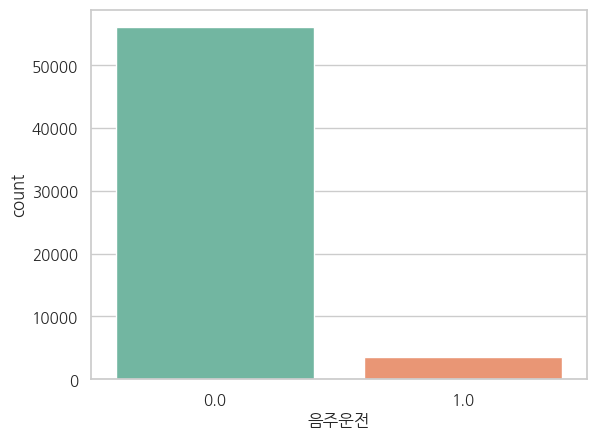

In [16]:
sns.countplot(x='음주운전', data=tr);

In [17]:
tr.음주운전.value_counts(normalize=True)

0.0    0.940694
1.0    0.059306
Name: 음주운전, dtype: float64

### <span style="color:#004f9f"> 1.1. 단일변수 시각화 </span>

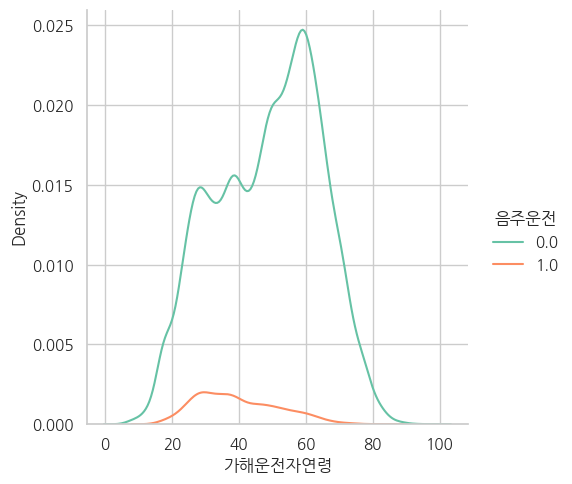

In [18]:
sns.displot(x='가해운전자연령', hue='음주운전', data=tr, kind='kde');

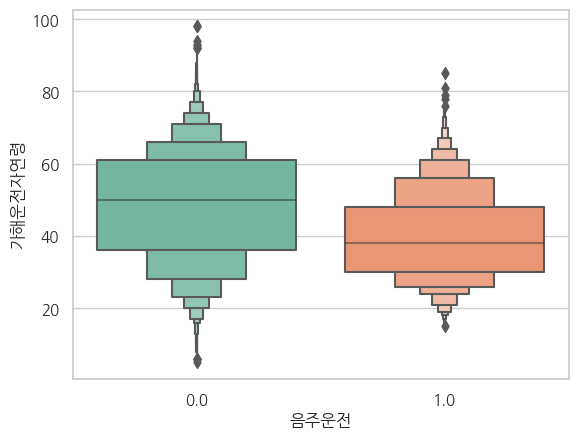

In [19]:
sns.boxenplot(x='음주운전', y='가해운전자연령', data=tr);

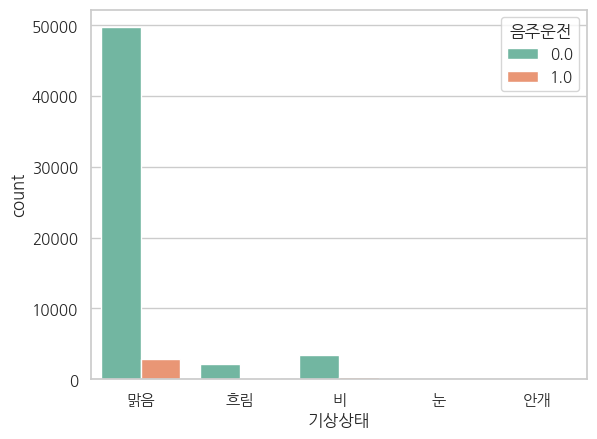

In [20]:
sns.countplot(x='기상상태', hue='음주운전', data=tr);

*이탤릭체 텍스트*### <span style="color:#004f9f"> 1.2. 다변수 시각화 </span>

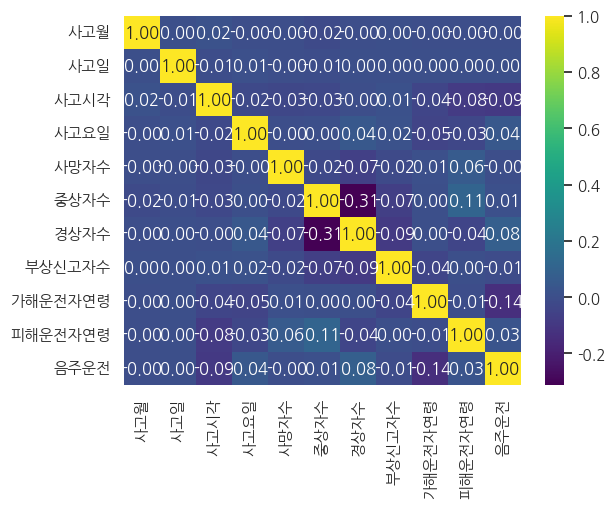

In [21]:
# 다중 공선성 제거하기용으로 0.9이상이면 제거
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');

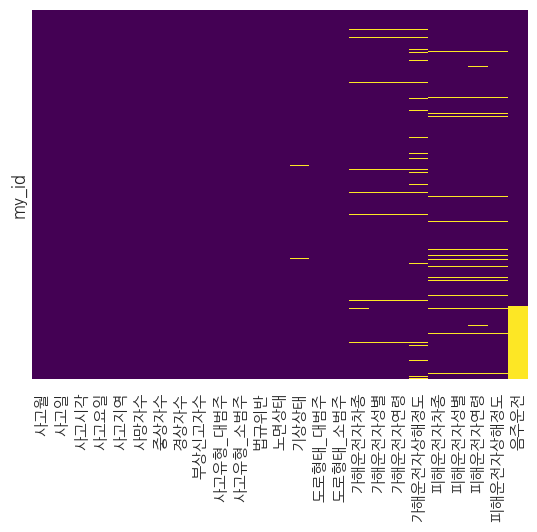

In [22]:
#노란색이 결측치
#결측치는 지우는게 좋음 (dropna)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, 
            linecolor='white',cmap='viridis');

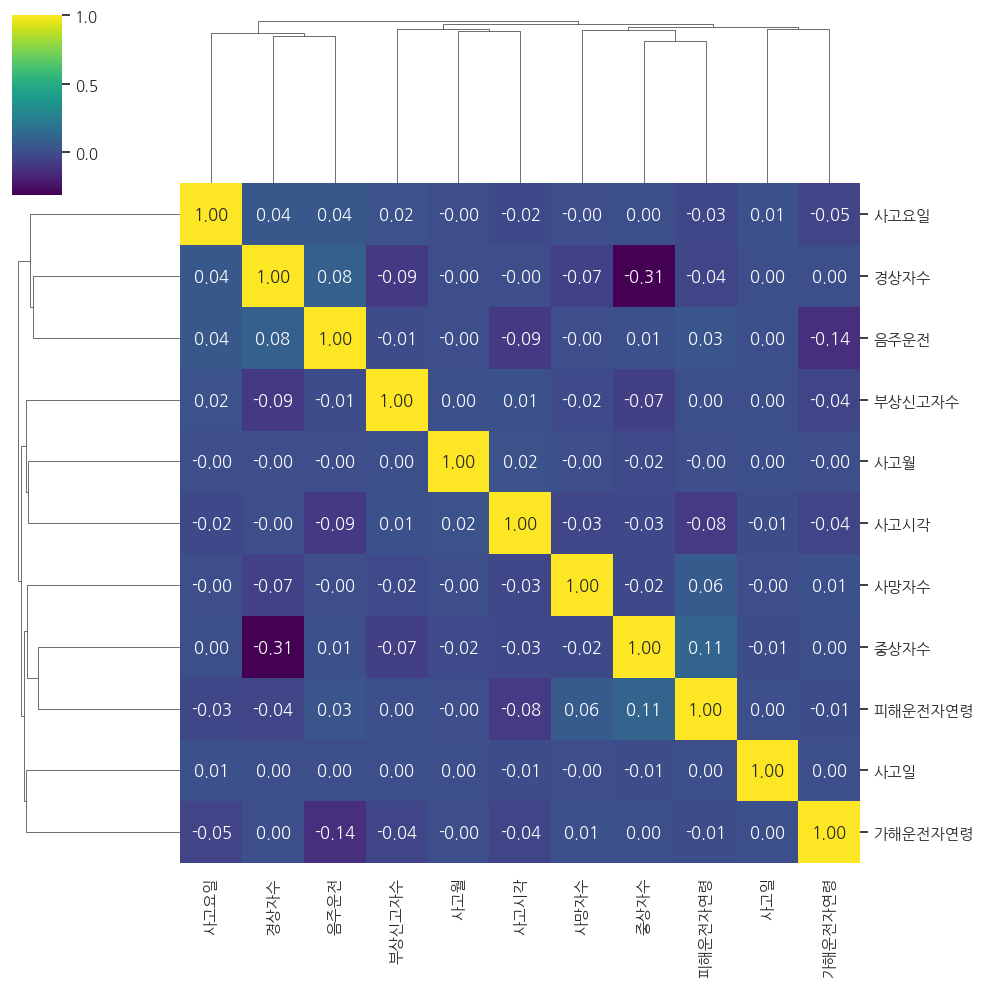

In [23]:
# 덴드로그램으로 비슷한거 묶거나 제거 (최종적으로 처리)
# 목표변수는 제거 하고 
sns.clustermap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');

#FE_AUTOML

In [24]:
import pandas as pd
import numpy as np
np.random.seed(1234)
df = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')

In [25]:
df = df[~df['음주운전'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59589 entries, A000002 to A074483
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고월        59589 non-null  int64  
 1   사고일        59589 non-null  int64  
 2   사고시각       59589 non-null  int64  
 3   사고요일       59589 non-null  int64  
 4   사고지역       59589 non-null  object 
 5   사망자수       59589 non-null  int64  
 6   중상자수       59589 non-null  int64  
 7   경상자수       59589 non-null  int64  
 8   부상신고자수     59589 non-null  int64  
 9   사고유형_대범주   59589 non-null  object 
 10  사고유형_소범주   59589 non-null  object 
 11  법규위반       59589 non-null  object 
 12  노면상태       59589 non-null  object 
 13  기상상태       58859 non-null  object 
 14  도로형태_대범주   59589 non-null  object 
 15  도로형태_소범주   59589 non-null  object 
 16  가해운전자차종    58158 non-null  object 
 17  가해운전자성별    58163 non-null  object 
 18  가해운전자연령    58154 non-null  float64
 19  가해운전자상해정도  56084 non-null  object 
 20  피해운

In [26]:
cat_list = df.select_dtypes(['object']).columns.tolist()
num_list = df.select_dtypes(['number']).drop(columns='음주운전').columns.tolist()

In [27]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from pycaret import classification as cls
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [30]:
# 옵션 찾아보고 인자 추가하기
cls.setup(data=df, target='음주운전', train_size=0.7, session_id = 1234, use_gpu=True)

,Description,Value
0,Session id,1234
1,Target,음주운전
2,Target type,Binary
3,Original data shape,"(59589, 25)"
4,Transformed data shape,"(59589, 114)"
5,Transformed train set shape,"(41712, 114)"
6,Transformed test set shape,"(17877, 114)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,14


In [31]:
from sklearn.metrics import average_precision_score
cls.add_metric('apc', 'APC', average_precision_score, target = 'pred_proba')

Name                                                               APC
Display Name                                                       APC
Score Function       <function average_precision_score at 0x7f734c4...
Scorer               make_scorer(average_precision_score, needs_pro...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: apc, dtype: object

In [32]:
# 모델도 알아서 골라줌
# n_select -> 스태킹, 느린데 해볼만함 (601 자료)
#my_models = cls.compare_models(n_select=3, sort='apc')
top_model = cls.compare_models(n_select=1, sort='apc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
rf,Random Forest Classifier,0.9447,0.8802,0.1293,0.6813,0.2164,0.2014,0.2798,0.4282,1.3220
gbc,Gradient Boosting Classifier,0.9428,0.8572,0.0857,0.6212,0.1481,0.1363,0.2115,0.3750,1.1700
et,Extra Trees Classifier,0.9441,0.8614,0.1294,0.6519,0.2151,0.1993,0.2727,0.3730,1.5080
lr,Logistic Regression,0.9414,0.8466,0.0889,0.5377,0.1524,0.1379,0.2013,0.3248,1.6170
lda,Linear Discriminant Analysis,0.9363,0.8395,0.2227,0.4291,0.2929,0.2631,0.2788,0.3021,1.1290
ada,Ada Boost Classifier,0.9427,0.7085,0.0853,0.6206,0.1474,0.1355,0.2110,0.2681,1.2210
xgboost,Extreme Gradient Boosting,0.2542,0.7309,0.7882,0.0599,0.1113,0.0013,0.0054,0.2569,1.0410
lightgbm,Light Gradient Boosting Machine,0.9187,0.7874,0.0246,0.0351,0.0280,-0.0003,-0.0003,0.2263,1.0100
catboost,CatBoost Classifier,0.9267,0.7623,0.0837,0.3761,0.1165,0.0902,0.1292,0.2185,43.4120
knn,K Neighbors Classifier,0.9380,0.7246,0.1601,0.4402,0.2342,0.2091,0.2389,0.2011,4.6600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [33]:
#my_models = [cls.tune_model(m) for m in my_models]

In [34]:
#cls.plot_model(my_models[0], 'parameter')

In [35]:
#cls.plot_model(my_models[1], 'parameter')

In [36]:
#cls.plot_model(my_models[2], 'parameter')

In [37]:
#my_stacker = cls.stack_models(my_models, optimize='apc')

In [38]:
print(top_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1234, verbose=0, warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

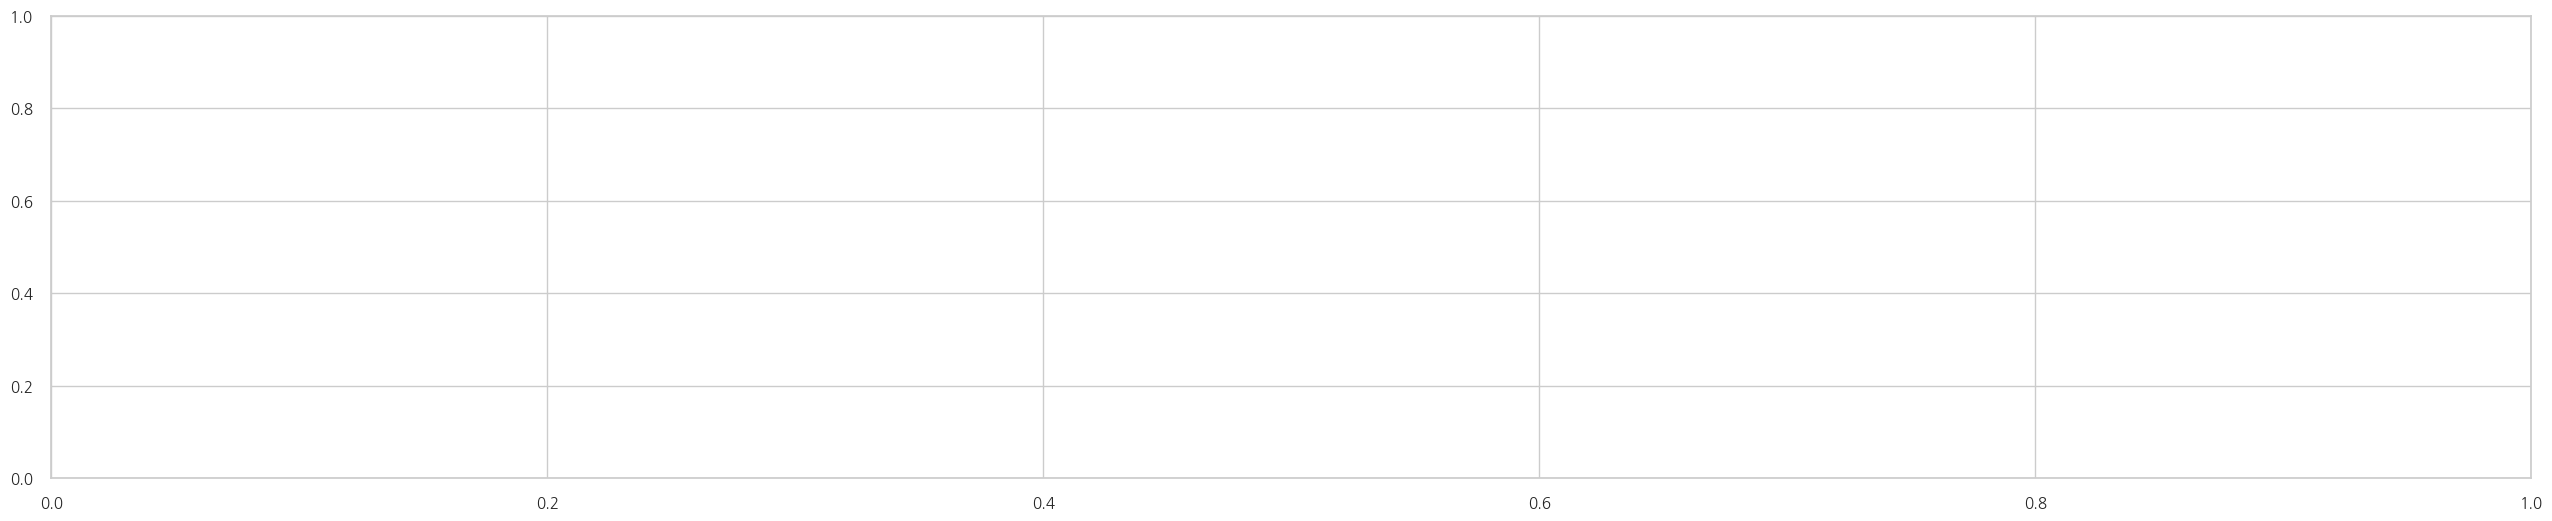

In [39]:
cls.evaluate_model(top_model)

In [40]:
final_model = cls.finalize_model(top_model)

In [41]:
cls.save_model(final_model, 'automl_ver01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['사고월', '사고일', '사고시각', '사고요일',
                                              '사망자수', '중상자수', '경상자수', '부상신고자수',
                                              '가해운전자연령', '피해운전자연령'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))...
                  RandomForestClassifier(bootstrap=Tru

In [42]:
te = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')
te = te[te['음주운전'].isnull()]
te = te.drop(columns='음주운전')

In [43]:
pred = cls.predict_model(final_model, data=te, raw_score=True)
pred.head()

,사고월,사고일,사고시각,사고요일,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형_대범주,...,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,prediction_label,prediction_score_0,prediction_score_1
my_id,,,,,,,,,,,,,,,,,,,,,
A051970,8,8,22,5,서초구,0,1,0,0,차대차,...,여,47.0,상해없음,승용,남,78.0,중상,0,0.89,0.11
A036817,9,2,22,2,강남구,0,0,2,0,차대차,...,남,48.0,상해없음,승용,남,67.0,경상,0,0.89,0.11
A021606,7,21,5,1,동작구,0,0,3,0,차대차,...,여,26.0,상해없음,승합,남,39.0,경상,0,0.72,0.28
A018391,12,30,18,2,강동구,0,0,2,0,차대차,...,남,46.0,상해없음,승용,남,25.0,경상,0,0.69,0.31
A002771,10,30,21,2,은평구,0,0,1,0,차대사람,...,남,46.0,상해없음,보행자,여,66.0,경상,0,0.98,0.02


In [44]:
pred = pred[['prediction_score_1']].reset_index()
pred.columns = ['my_id','prob']
pred.head()

,my_id,prob
0,A051970,0.11
1,A036817,0.11
2,A021606,0.28
3,A018391,0.31
4,A002771,0.02


In [45]:
pred.to_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/first_submission.csv', index=False)

* 월요일 아침, 주말여부
* 사고월(연말)
* 시각(범주형으로 바꾸면 도움됨) - 음주운전 시간대
* threshold 0.28 정도가 좋음
* 스태킹 느린데 해볼만함 (compare_model) 601자료


* 피쳐엔지니어링 - 범주형 변수의 범주를 줄여야함
* 파이캐럿 - 파라미터 조절 잘하기
* 자료도있음